In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

<h2>Define Hyper-parameters</h2>

In [2]:
#define number of training iterations
NUM_ITER = 1000000
num_in_epoch = 10000
#define learning rate
lr = 1e-3

<h2>Define your input data and expected labels</h2>

In [3]:
#define the training input data
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
#define the target outputs/labels for AND gate
y = np.array([0,1,0,1],np.float32)
#y = np.array([0,1,1,1],np.float32)       (uncomment this line if you are doing OR gate)
y = np.reshape(y,[4,1])

<h2>Define placeholder and Variables</h2>

In [4]:
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

In [5]:
#define the weights and initialized with random normal distribution
W1 = tf.Variable(tf.random_normal([2,2]),tf.float32,name='W1')
W2 = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W2')
#define the bias with zero initialization
b1 = tf.Variable(tf.zeros([1,2]),tf.float32,name='b1')
b2 = tf.Variable(tf.zeros([1,1]),tf.float32,name='b2')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define Neural Network

In [6]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hidden = tf.sigmoid(tf.add(tf.matmul(X,W1),b1))
Y_hat = tf.add(tf.matmul(Y_hidden,W2),b2)


<h2>Define cost function</h2>

In [7]:
#the error between target and logit
loss = tf.losses.sigmoid_cross_entropy(Y,Y_hat)

Instructions for updating:
Use tf.cast instead.


<h2>Execute training</h2>

In [8]:
#use standard gradient descent
train = tf.train.GradientDescentOptimizer(lr).minimize(loss)
#define accuracy
accuracy = 1 - tf.to_float(tf.count_nonzero(Y-tf.round(tf.sigmoid(Y_hat))))/4.0
#initialize tensorflow variables
init_g = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()

In [9]:
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init_g)
    sess.run(init_l)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train,feed_dict = {X:x,Y:y})

        if i % num_in_epoch == 0:
            accu = sess.run(accuracy,feed_dict = {X:x,Y:y})
            los_train = sess.run(loss,feed_dict = {X:x,Y:y})
            print('epoch',i/num_in_epoch,'----loss: ',los_train,', accuarcy: ',accu)
    
    Y_HAT = sess.run(Y_hat,feed_dict = {X:x,Y:y})   
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    Weight1 = np.squeeze(sess.run(W1))
    Weight2 = np.squeeze(sess.run(W2))
    bias1 = np.squeeze(sess.run(b1))
    bias2 = np.squeeze(sess.run(b2))


epoch 0.0 ----loss:  0.8890112 , accuarcy:  0.5
epoch 1.0 ----loss:  0.69740945 , accuarcy:  0.5
epoch 2.0 ----loss:  0.6954746 , accuarcy:  0.5
epoch 3.0 ----loss:  0.693928 , accuarcy:  0.5
epoch 4.0 ----loss:  0.6925195 , accuarcy:  0.5
epoch 5.0 ----loss:  0.6911278 , accuarcy:  0.5
epoch 6.0 ----loss:  0.68966556 , accuarcy:  0.5
epoch 7.0 ----loss:  0.68805647 , accuarcy:  0.5
epoch 8.0 ----loss:  0.6862222 , accuarcy:  0.5
epoch 9.0 ----loss:  0.6840772 , accuarcy:  0.5
epoch 10.0 ----loss:  0.68152565 , accuarcy:  0.5
epoch 11.0 ----loss:  0.6784628 , accuarcy:  0.5
epoch 12.0 ----loss:  0.67477804 , accuarcy:  0.5
epoch 13.0 ----loss:  0.6703666 , accuarcy:  0.5
epoch 14.0 ----loss:  0.6651393 , accuarcy:  0.75
epoch 15.0 ----loss:  0.659042 , accuarcy:  0.75
epoch 16.0 ----loss:  0.6520671 , accuarcy:  0.75
epoch 17.0 ----loss:  0.64427197 , accuarcy:  0.75
epoch 18.0 ----loss:  0.6357708 , accuarcy:  0.75
epoch 19.0 ----loss:  0.6267375 , accuarcy:  0.75
epoch 20.0 ----loss:

<h2> State of weights

In [10]:
    print('W1:')
    print(Weight1)
    print('W2')
    print(Weight2)
    print('b1')
    print(bias1)
    print('b2')
    print(bias2)
    
    print('Y_hat:')
    print(Y_HAT)

    print('accuracy')
    print(np.round(1/(1 + np.exp(-Y_HAT))))

W1:
[[ 6.5811973  5.498783 ]
 [-6.479562  -5.8196526]]
W2
[-9.300846   9.9306135]
b1
[ 3.3180118 -2.9221098]
b2
4.2991543
Y_hat:
[[-4.1693783]
 [ 4.227742 ]
 [-4.333784 ]
 [ 3.9227686]]
accuracy
[[0.]
 [1.]
 [0.]
 [1.]]


<h2>Plot</h2>

In [21]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y1 = 1 / Weight1[1,0] * (-Weight1[0,0] * plot_x - bias1[0])
plot_y2 = 1 / Weight1[1,1] * (-Weight1[0,1] * plot_x - bias1[1])

3.3180118


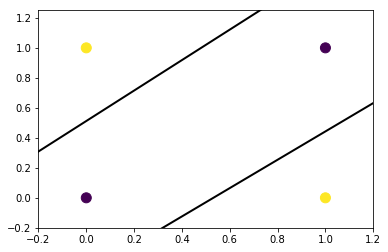

In [22]:
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y1, color='k', linewidth=2)
plt.plot(plot_x, plot_y2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()